In this notebook, I will answer the question: "What the top 10 shops and delivery companies that are connected with high number of incidents? how does that look relative to their total contribution of orders?" and the answer to it. This might reveal answers that are helpful to the business or operations team to guide certain beneficial decisions.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [3]:
df = pd.read_csv('./anonymized/Orders-Grid view.csv')
df.head()

,Order ID,Order Date,Shop,Pick Up Emirate,Drop Off Emirate,Drop Off Area,Delivery Company,Status,COD,Delivery Cost,Charge to Customer,Category,Delivery Route,Month - Formula,Month
0,6713.0,1/2/2021,Shop001,Abu Dhabi,Dubai,NaN,DeliveryCompany01,Cancelled/Returned,NaN,NaN,NaN,SM,Abu Dhabi to Dubai,February,February
1,3015.0,1/9/2020,Shop002,Dubai,Fujeirah,Hamad bin abdulla road,DeliveryCompany01,Cancelled/Returned,NaN,AED 0.00,AED 0.00,NaN,Dubai to Fujeirah,September,September
2,3016.0,1/9/2020,Shop003,Abu Dhabi,Al Ain,Villa 8,DeliveryCompany01,Delivered,NaN,AED 32.00,AED 45.00,NaN,Abu Dhabi to Al Ain,September,September
3,3024.0,1/9/2020,Shop004,Abu Dhabi,Ras Al Khaimah,Alkharan,DeliveryCompany01,Delivered,NaN,AED 32.00,AED 60.00,NaN,Abu Dhabi to Ras Al Khaimah,September,September
4,3022.0,1/9/2020,Shop005,Sharjah,Abu Dhabi,NaN,DeliveryCompany02,Delivered,NaN,AED 30.00,AED 45.00,NaN,Sharjah to Abu Dhabi,September,September


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            4582 non-null   float64
 1   Order Date          5189 non-null   object 
 2   Shop                5189 non-null   object 
 3   Pick Up Emirate     5189 non-null   object 
 4   Drop Off Emirate    5179 non-null   object 
 5   Drop Off Area       4498 non-null   object 
 6   Delivery Company    5189 non-null   object 
 7   Status              5189 non-null   object 
 8   COD                 1475 non-null   object 
 9   Delivery Cost       4202 non-null   object 
 10  Charge to Customer  4278 non-null   object 
 11  Category            4523 non-null   object 
 12  Delivery Route      5189 non-null   object 
 13  Month - Formula     5189 non-null   object 
 14  Month               5189 non-null   object 
dtypes: float64(1), object(14)
memory usage: 608.2+ KB


In [6]:
#fixing the data type of Order Date
df['Order Date']= pd.to_datetime(df['Order Date'],format='%d/%m/%Y', errors='raise') 

# Counting Incident Relatively by Shops

Here, I try to understand which are the shops that have the highest undelivered state, then plot relatively to the total orders those shops bring in.

In [7]:
df['Status'].value_counts(dropna=False)

Delivered             5027
Cancelled/Returned     148
Damaged                  9
Assigned                 3
Not Assigned             2
Name: Status, dtype: int64

<AxesSubplot:title={'center':'Shops: Incidents Number vs Total Orders Number'}, ylabel='Number of Orders'>

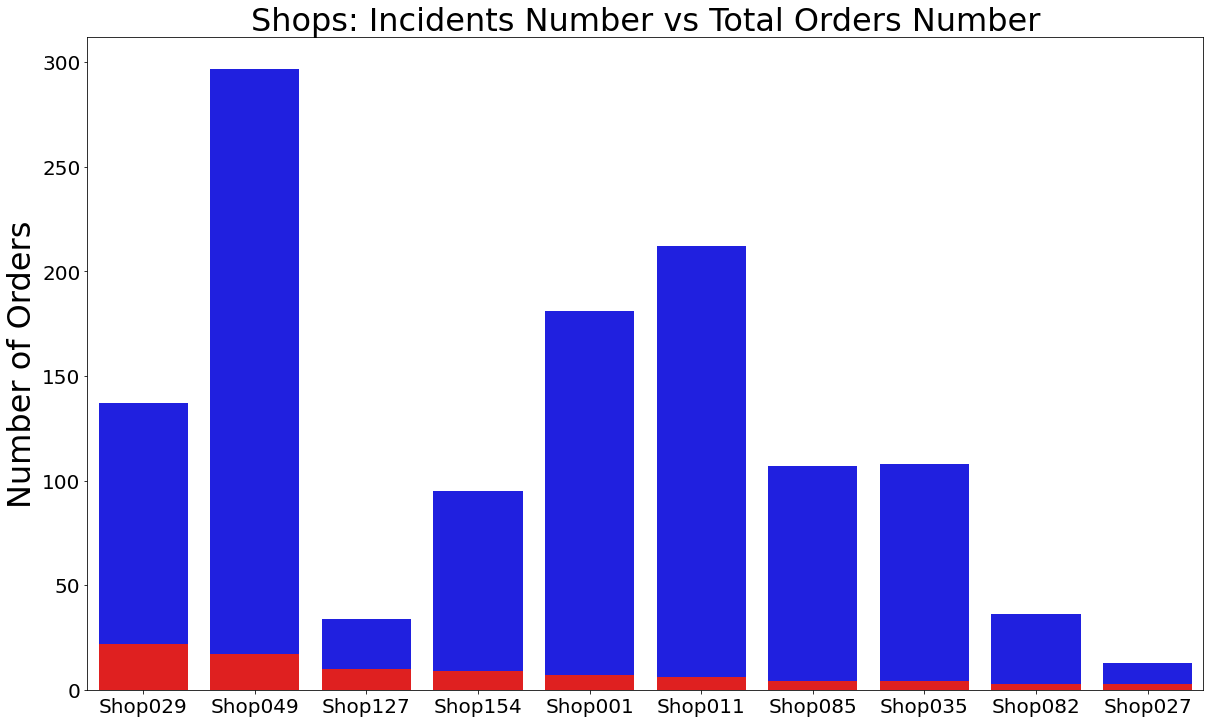

In [23]:
sns.set_context({"figure.figsize": (20, 12)})

rc={'axes.labelsize': 32, 'font.size': 20, 'legend.fontsize': 32.0, 'axes.titlesize': 32}
sns.set_context(rc)

undelivered_shops_counts = df[df['Status'] !='Delivered']["Shop"].value_counts(dropna=False)
undelivered_shops_counts = undelivered_shops_counts[:10,]

total_shops_counts_with_undeliveries = df[df['Shop'].isin(undelivered_shops_counts.index)]["Shop"].value_counts()

ax = sns.barplot(x = undelivered_shops_counts.index, y = total_shops_counts_with_undeliveries[undelivered_shops_counts.index] , color = "blue")
ax.set_ylabel("Number of Orders")
ax.set_title("Shops: Incidents Number vs Total Orders Number")
sns.barplot(x = undelivered_shops_counts.index, y = undelivered_shops_counts.values , color = "red")


Visually, it seems that **33%** of **Shop127** orders, **20%** of orders by **Shop029**, **1/12** of Shop049 end up in trouble. Maybe don't take those orders...

## Checking which service providers (delivery companies) cause the most trouble

Now we do the same type of analysis for delivery companies, checking whether one of them might need attention

<AxesSubplot:title={'center':'Delivery Companies: Incidents Number vs Total Orders Number'}, ylabel='Number of Orders'>

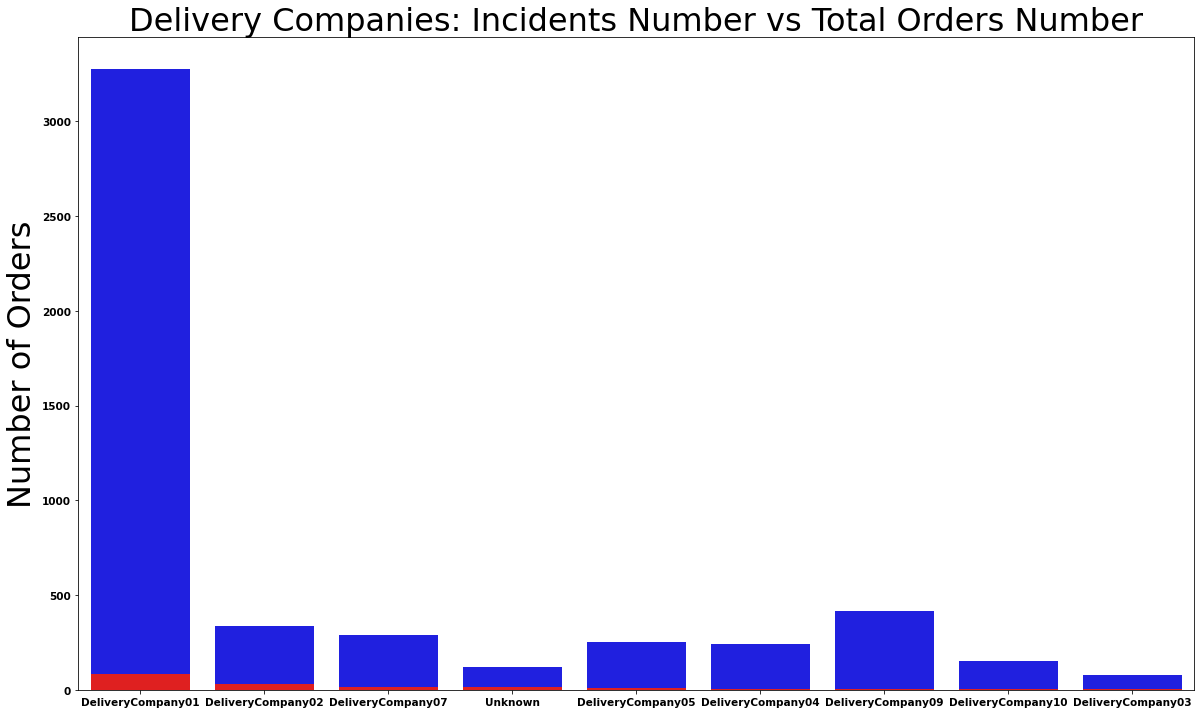

In [29]:
undelivered_providers_counts = df[df['Status'] !='Delivered']["Delivery Company"].value_counts(dropna=True)
undelivered_providers_counts = undelivered_providers_counts[:10,] #choosing the top 10

total_providers_counts_with_undeliveries = df[df['Delivery Company'].isin(undelivered_providers_counts.index)]['Delivery Company'].value_counts()

rc={'axes.labelsize': 32, 'font.size': 10.5, 'font.weight': 'bold', 'legend.fontsize': 32.0, 'axes.titlesize': 32}
sns.set_context(rc)

ax = sns.barplot(x = undelivered_providers_counts.index, y = total_providers_counts_with_undeliveries[undelivered_providers_counts.index] , color = "blue")
ax.set_ylabel("Number of Orders")
ax.set_title("Delivery Companies: Incidents Number vs Total Orders Number")
sns.barplot(x = undelivered_providers_counts.index, y = undelivered_providers_counts.values , color = "red")

**Everything seems normal here, we don't see a specific delivery company that is unworth of being a provider**

Lots of dependency on "DeliveryCompany01"